In [35]:
import pandas as pd
%matplotlib nbagg
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('titanic-passengers.csv', sep = ';')
data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [4]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data = data.dropna(axis = 0, how ='any')  

In [7]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<IPython.core.display.Javascript object>


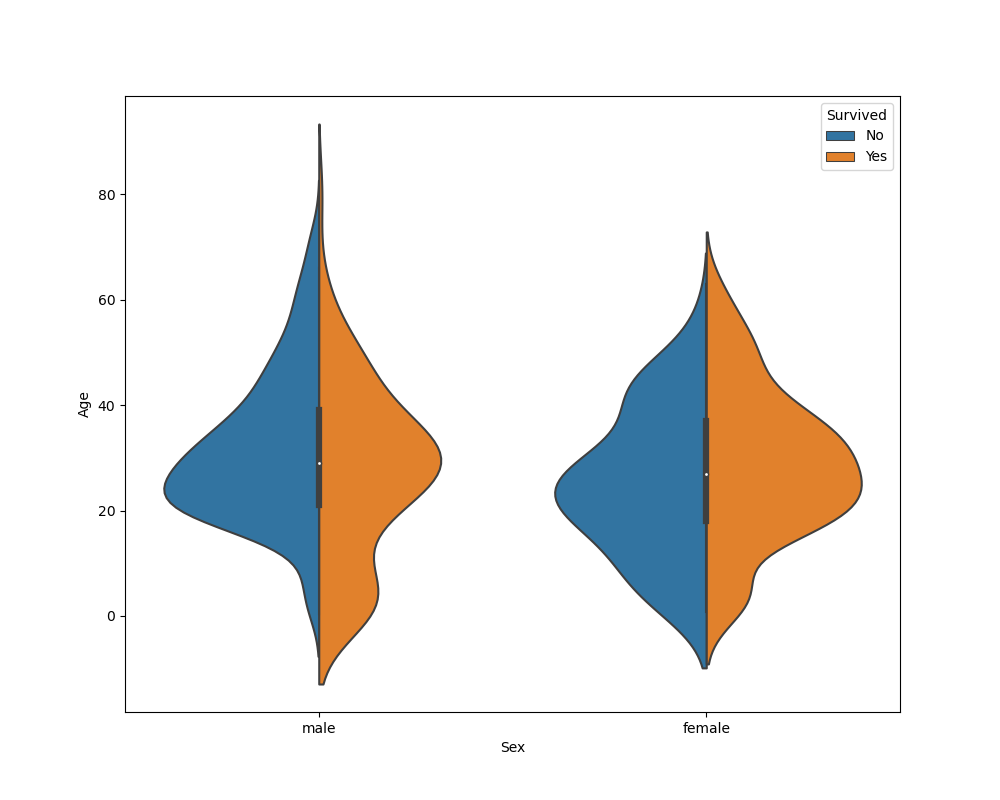

<AxesSubplot:xlabel='Sex', ylabel='Age'>

In [5]:
plt.subplots( figsize =( 10 , 8 ) )
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = data, split = True)

In [ ]:
#Ce graphique donne un résumé de la tranche d’âge des hommes, 
#des femmes et des enfants qui ont été sauvés. Le taux de survie est de :  

#Bon pour les enfants.
#Élevé pour les femmes de 20 à 50 ans.
#Moins pour les hommes à mesure que l’âge augmente.

<IPython.core.display.Javascript object>


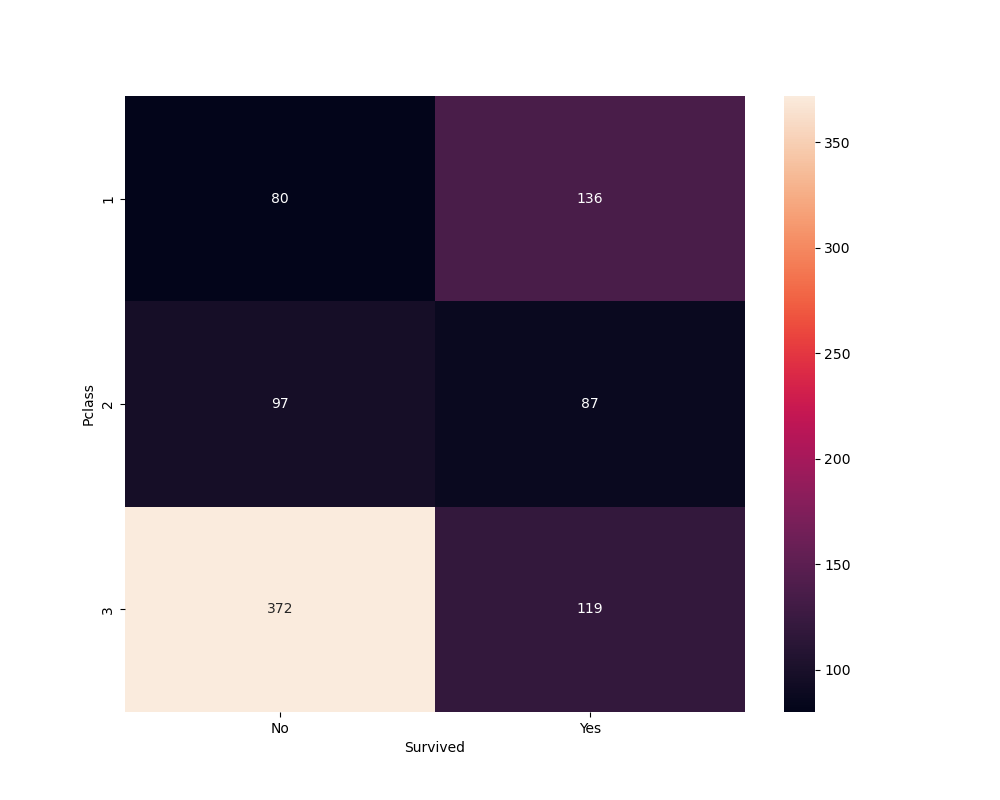

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

In [7]:
plt.subplots( figsize =( 10 , 8 ) )
group = data.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot = True, fmt ="d")

In [ ]:
#Les passagers de classe 1 ont une chance de survie plus élevée par rapport aux classes 2 et 3 .
#Cela implique que la class contribue beaucoup au taux de survie d’un passager.

In [48]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

<IPython.core.display.Javascript object>


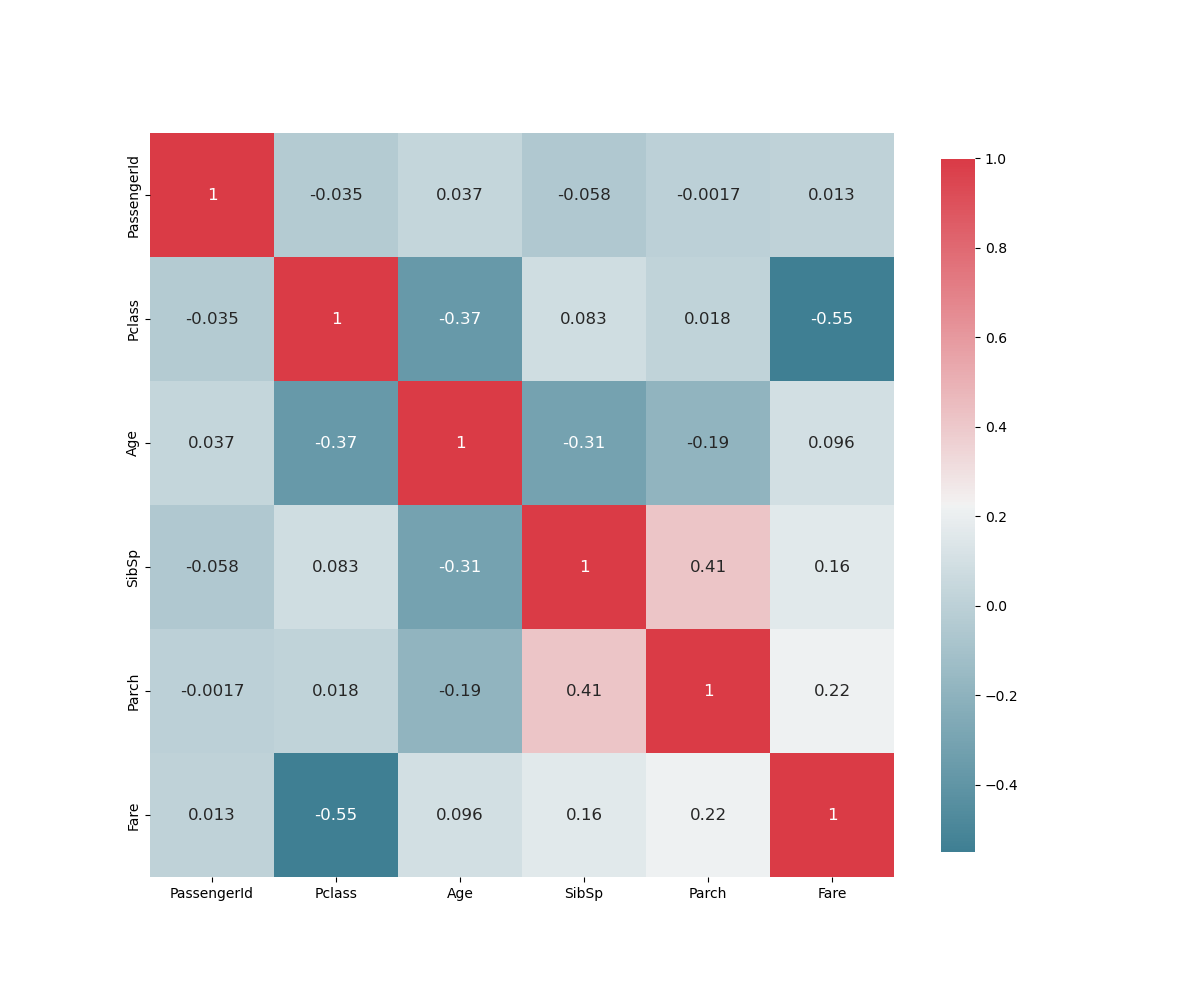

In [51]:
 plot_correlation_map(data)

In [ ]:
#Cette fonction est une corrélation de carte thermique

#I see a strong positive correlation between is the Parch variable and sibsp 0.4;
#a strong negative correlation, Between Fare and Pclass -0.55

In [9]:
data.groupby(['Pclass', 'Survived']).mean()

PassengerId        Age     SibSp     Parch       Fare
Pclass Survived                                                       
1      No         410.300000  43.695312  0.287500  0.300000  64.684007
       Yes        491.772059  35.368197  0.492647  0.389706  95.608029
2      No         452.123711  33.544444  0.319588  0.144330  19.412328
       Yes        439.080460  25.901566  0.494253  0.643678  22.055700
3      No         453.580645  26.555556  0.672043  0.384409  13.669364
       Yes        394.058824  20.646118  0.436975  0.420168  13.694887

In [37]:
data.drop(['PassengerId','Ticket','Cabin'] ,1,inplace=True)

C:\Users\hp\AppData\Local\Temp/ipykernel_10616/755337502.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(['PassengerId','Ticket','Cabin'] ,1,inplace=True)


In [3]:
#data.columns

In [39]:
#ajout d'une nouvelle colonne Titre 
new = data["Name"].str.split(" ", n = 2, expand = True)

In [40]:
data["Titre"]= new[1]

In [41]:
#le tritre est bien affiché avec les les titres de la colonne Nom
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Titre
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,S,Mr.
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,S,Mr.
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,S,Mr.
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S,Mrs.
4,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,S,Mr.


<IPython.core.display.Javascript object>


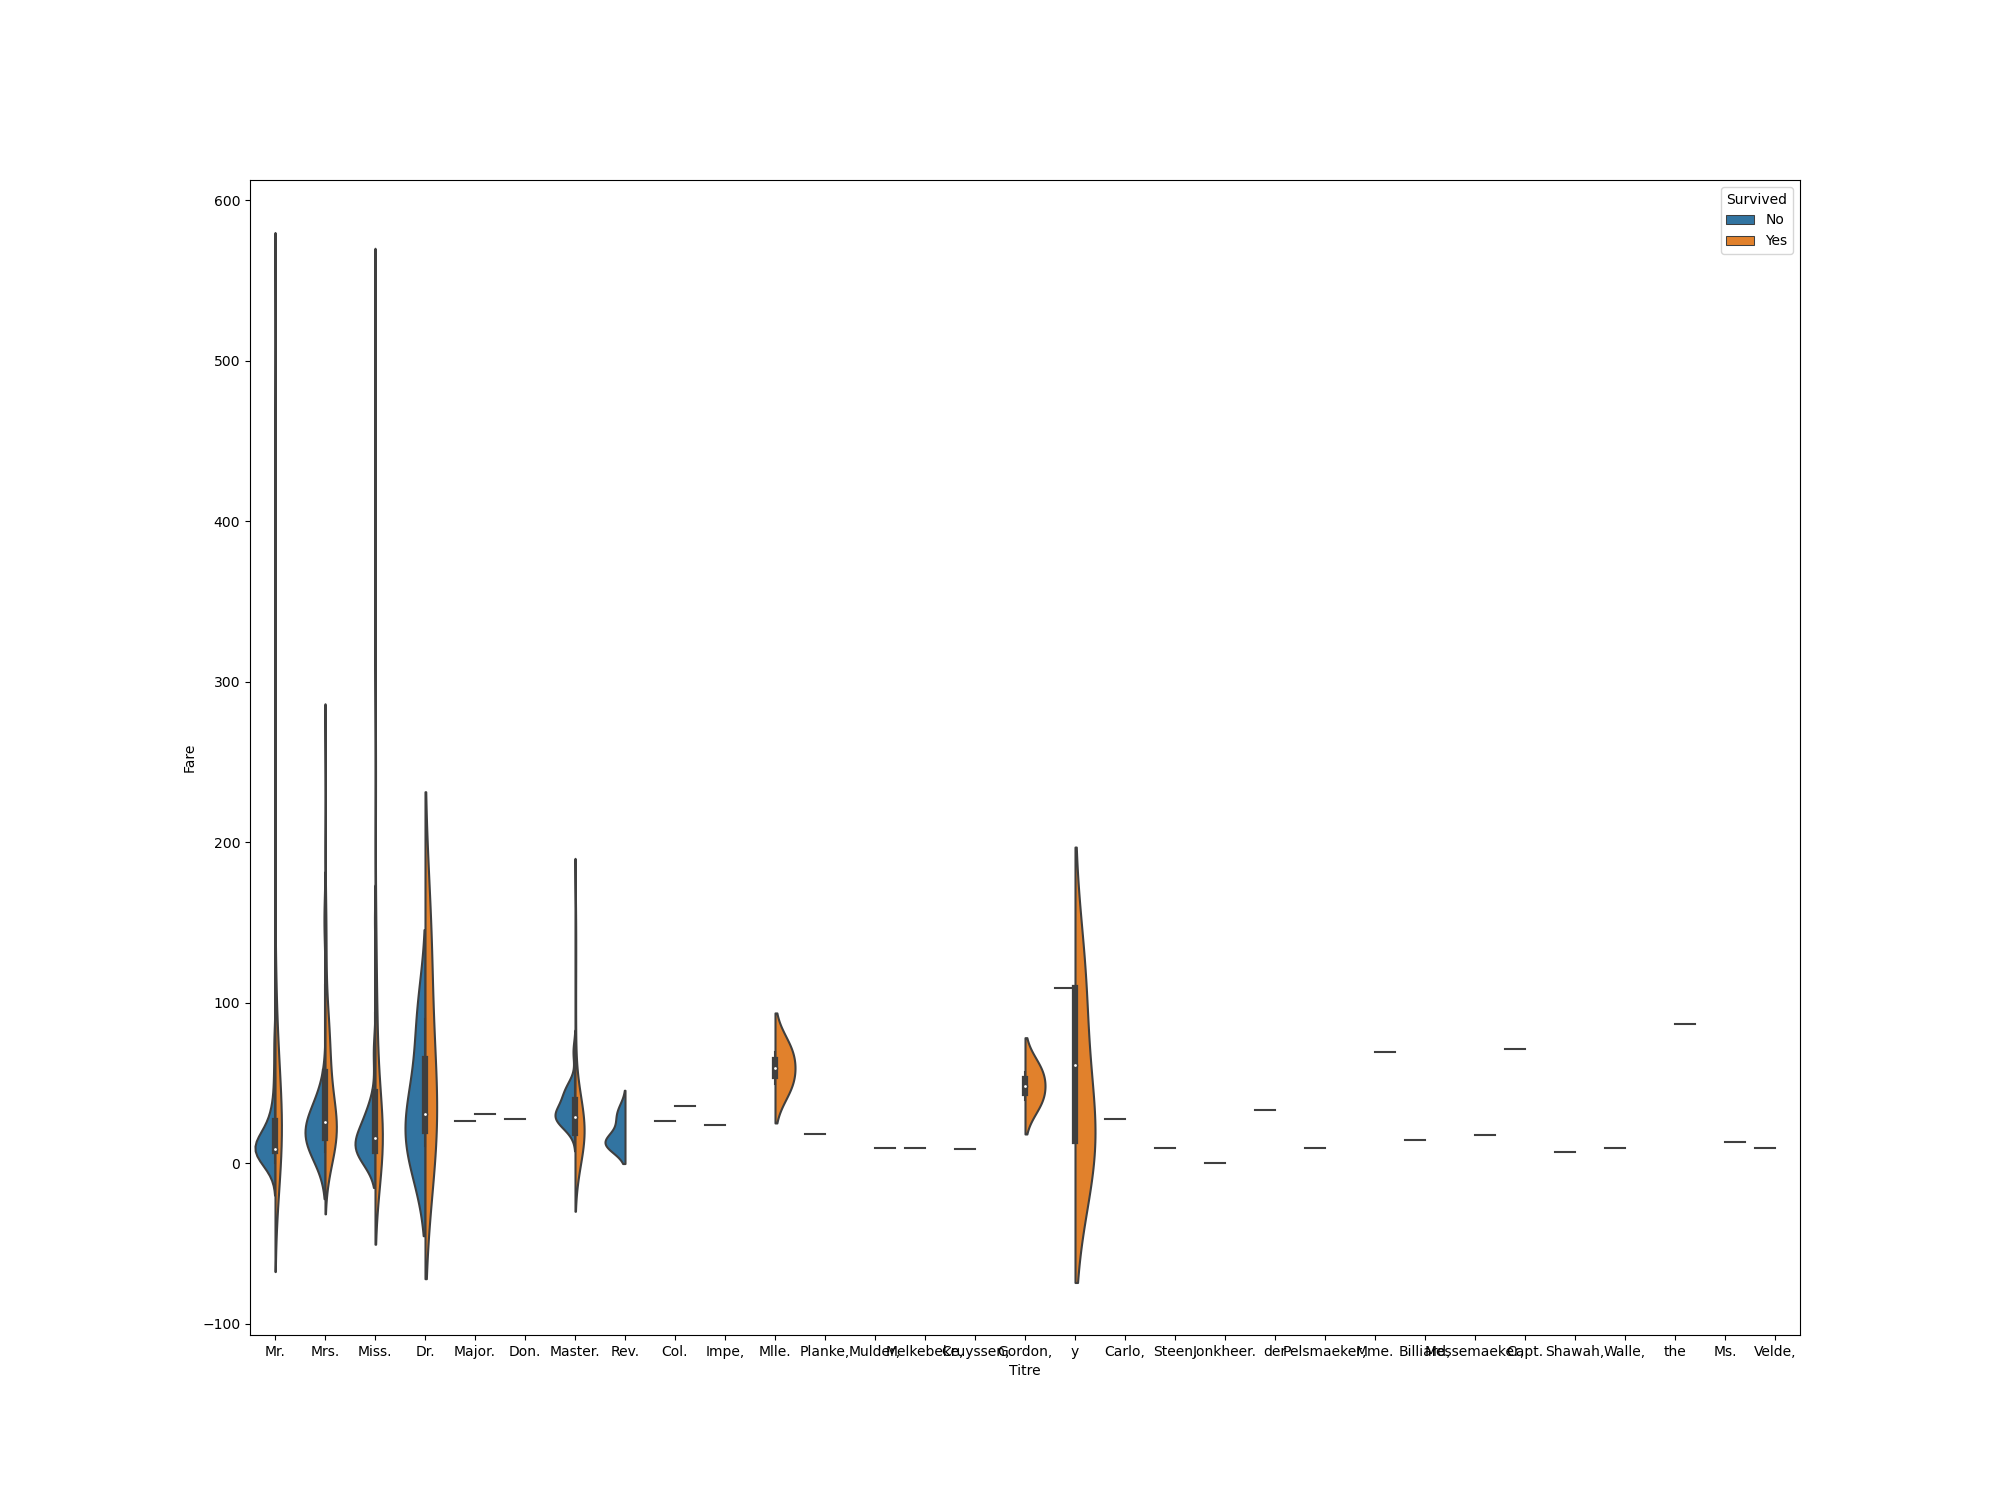

<AxesSubplot:xlabel='Titre', ylabel='Fare'>

In [42]:
plt.subplots( figsize =( 20 , 15 ) )
sns.violinplot(x ="Titre", y ="Fare", hue ="Survived",
data = data, split = True)

<IPython.core.display.Javascript object>


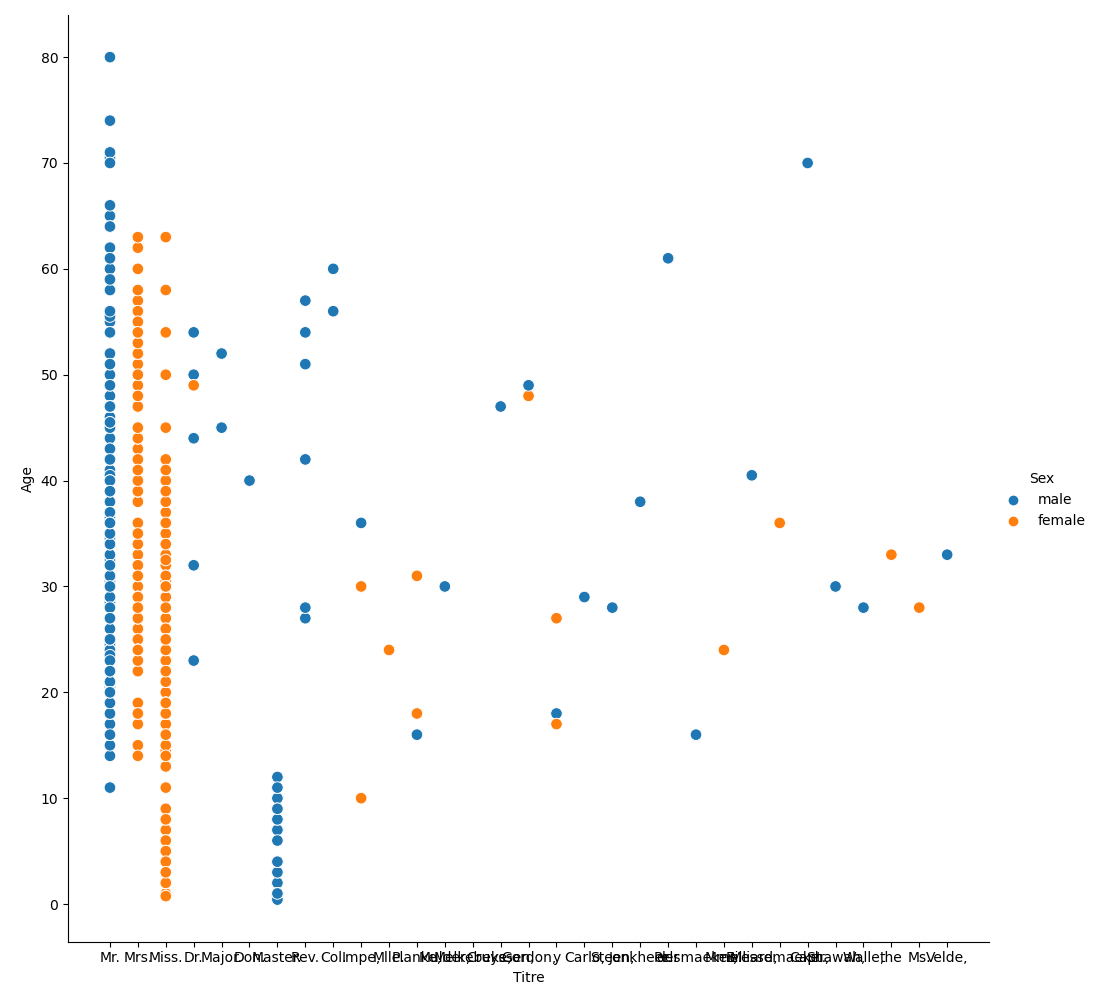

In [54]:
sns.relplot(x="Titre",y="Age",hue="Sex",data=data,height=10,s=70) ; plt.show()